<a href="https://colab.research.google.com/github/LuFernandez/imagaynes/blob/master/Morfologia/Morfologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import clear_output

In [80]:
!wget 'https://raw.githubusercontent.com/LuFernandez/imagaynes/master/Morfologia/Imagenes/Ej1.PNG'
!wget 'https://raw.githubusercontent.com/LuFernandez/imagaynes/master/Morfologia/Imagenes/cuadrados.PNG'
!wget 'https://raw.githubusercontent.com/LuFernandez/imagaynes/master/Morfologia/Imagenes/Ej3.PNG'
!wget 'https://raw.githubusercontent.com/LuFernandez/imagaynes/master/Morfologia/Imagenes/Ej4.PNG'
clear_output()

##1. Dilación

###Mostramos la imagen original

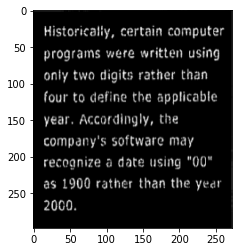

In [81]:
img1 = cv2.imread('Ej1.PNG')
plt.imshow(img1)

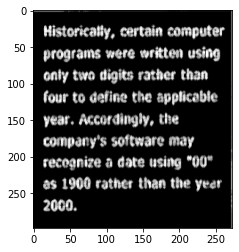

In [82]:
B = np.array([[0, 1, 0],
     [1, 1, 1],
     [0, 1, 0]], np.uint8)

dilation = cv2.dilate(img1, B, iterations = 1)

plt.imshow(dilation)      

## Ejercicio2

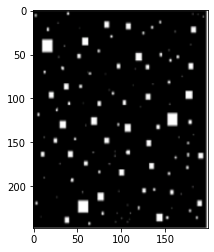

In [83]:
img = cv2.imread('cuadrados.PNG')
plt.imshow(img)

In [84]:
def MakeSubplot(img,fig,row,column,index,title):
  fig.add_subplot(row,column,index)
  plt.title(title)
  plt.axis('off')
  plt.imshow(img,cmap='gray', vmin=0)

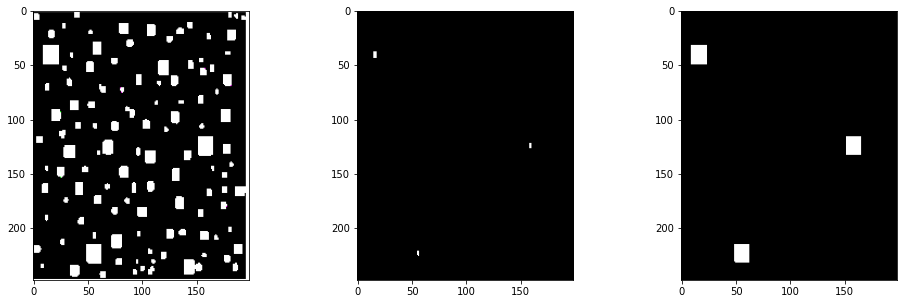

In [85]:
img[img>0] = 255
kernel = np.ones((13,13),np.uint16)
eroded = cv2.erode(img,kernel,iterations = 1)

dilated = cv2.dilate(eroded,kernel,iterations = 1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=False, figsize =(12,12))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.5, wspace = 0.5)

ax1.imshow(img)

ax2.imshow(eroded)

ax3.imshow(dilated)

plt.show()

## Ejercicio 3 - Operador apertura

In [86]:
def CircularKernel(radius, kernel_size = 50):
  kernel = np.zeros( shape = (kernel_size,kernel_size), dtype=np.uint8)
  center = kernel_size//2
  for i in range(0, kernel_size):
        for j in range(0, kernel_size):
            if ((center - i) ** 2 + (center - j) ** 2) <= radius**2:
                  kernel[i,j] = 1
  return kernel.astype(np.uint8)


In [87]:
def ApplyOpening(kernel, img):
  eroded = cv2.erode(img,kernel,iterations = 1)
  return cv2.dilate(eroded,kernel,iterations = 1)

def ApplyClosing(kernel, img):
  dilated = cv2.dilate(img,kernel,iterations = 1)
  return cv2.erode(dilated,kernel,iterations = 1)

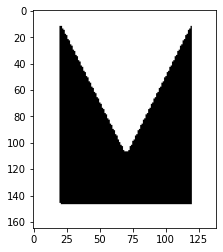

In [88]:
img3 = cv2.imread('Ej3.PNG')
#Binarizo la imagen
img3[img3 > 100] = 255
img3[img3 < 100] = 0

plt.imshow(img3)

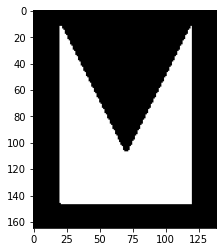

In [89]:
img3_inv = 255 - img3
plt.imshow(img3_inv)

Radio a utilizar para la apertura:

In [90]:
radio = 8
kernel = CircularKernel(radio)

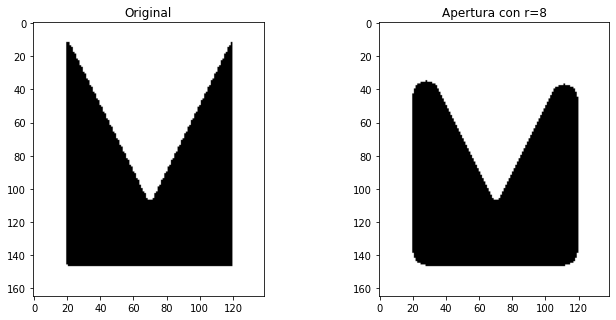

In [91]:
#Armo el elemento estructural
opened = ApplyOpening(kernel, img3_inv)
opened_inv = 255 - opened
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=False, figsize =(8,8))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.5, wspace = 0.5)

ax1.set_title("Original")
ax1.imshow(img3)

ax2.set_title("Apertura con r="+str(radio))
ax2.imshow(opened_inv.astype(int))

plt.show()

## Ejercicio 4 - Extraer contorno

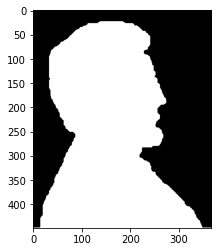

In [93]:
img4 = cv2.imread('Ej4.PNG')
#Binarizo la imagen
img4[img4 > 100] = 255
img4[img4 < 100] = 0
plt.imshow(img4)

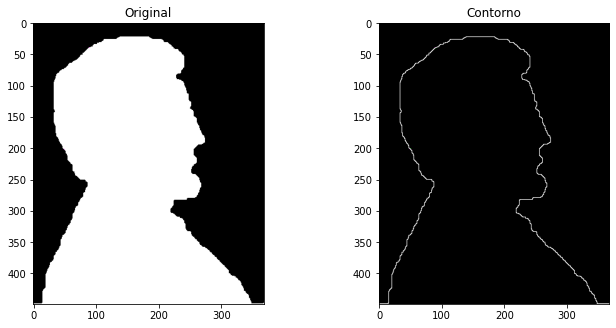

In [94]:
kernel = np.ones(shape=(3,3))
#Erosiono la imagen
eroded = cv2.erode(img4,kernel,iterations = 1)
#Obtengo el borde haciendo la resta
contour = img4 - eroded

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=False, figsize =(8,8))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.5, wspace = 0.5)

ax1.set_title("Original")
ax1.imshow(img4)

ax2.set_title("Contorno")
ax2.imshow(contour.astype(int))

plt.show()

## Ejercicio 5 - Investigar que es (y dar ejemplos) de:

### a) Thinning

### b) Thickening 

### c) Top-hat transform

### d) Hit and Miss